In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

print("Libraries imported successfully!")


Libraries imported successfully!


In [3]:

df = pd.read_csv("C:/Users/mdkh7/OneDrive/Desktop/weatherAUS.csv")

print("Data loaded!")
print("Shape:", df.shape)
print("Columns:", len(df.columns))


Data loaded!
Shape: (145460, 23)
Columns: 23


In [5]:
# CELL 3: Basic Data Info
print("Dataset Overview:")
print("================")
print(f"Rows: {df.shape[0]:,}")
print(f"Columns: {df.shape[1]}")

print("\nFirst 3 rows:")
print(df.head(3))

print("\nColumn names:")
for i, col in enumerate(df.columns, 1):
    print(f"{i:2}. {col}")


Dataset Overview:
Rows: 145,460
Columns: 23

First 3 rows:
         Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   

   RainTomorrow  


In [7]:
# CELL 4: Data Quality
print("Missing Values:")
print("===============")
missing = df.isnull().sum()
for col in df.columns:
    if missing[col] > 0:
        pct = (missing[col] / len(df)) * 100
        print(f"{col}: {missing[col]:,} ({pct:.1f}%)")

print(f"\nData types:")
print(df.dtypes.value_counts())


Missing Values:
MinTemp: 1,485 (1.0%)
MaxTemp: 1,261 (0.9%)
Rainfall: 3,261 (2.2%)
Evaporation: 62,790 (43.2%)
Sunshine: 69,835 (48.0%)
WindGustDir: 10,326 (7.1%)
WindGustSpeed: 10,263 (7.1%)
WindDir9am: 10,566 (7.3%)
WindDir3pm: 4,228 (2.9%)
WindSpeed9am: 1,767 (1.2%)
WindSpeed3pm: 3,062 (2.1%)
Humidity9am: 2,654 (1.8%)
Humidity3pm: 4,507 (3.1%)
Pressure9am: 15,065 (10.4%)
Pressure3pm: 15,028 (10.3%)
Cloud9am: 55,888 (38.4%)
Cloud3pm: 59,358 (40.8%)
Temp9am: 1,767 (1.2%)
Temp3pm: 3,609 (2.5%)
RainToday: 3,261 (2.2%)
RainTomorrow: 3,267 (2.2%)

Data types:
float64    16
object      7
Name: count, dtype: int64


In [9]:
# CELL 5: Basic Statistics
numeric_cols = ['MinTemp', 'MaxTemp', 'Rainfall', 'Humidity9am', 'Pressure9am']
available_cols = [col for col in numeric_cols if col in df.columns]

print("Basic Statistics for Key Variables:")
print("===================================")
print(df[available_cols].describe().round(2))


Basic Statistics for Key Variables:
         MinTemp    MaxTemp   Rainfall  Humidity9am  Pressure9am
count  143975.00  144199.00  142199.00    142806.00    130395.00
mean       12.19      23.22       2.36        68.88      1017.65
std         6.40       7.12       8.48        19.03         7.11
min        -8.50      -4.80       0.00         0.00       980.50
25%         7.60      17.90       0.00        57.00      1012.90
50%        12.00      22.60       0.00        70.00      1017.60
75%        16.90      28.20       0.80        83.00      1022.40
max        33.90      48.10     371.00       100.00      1041.00


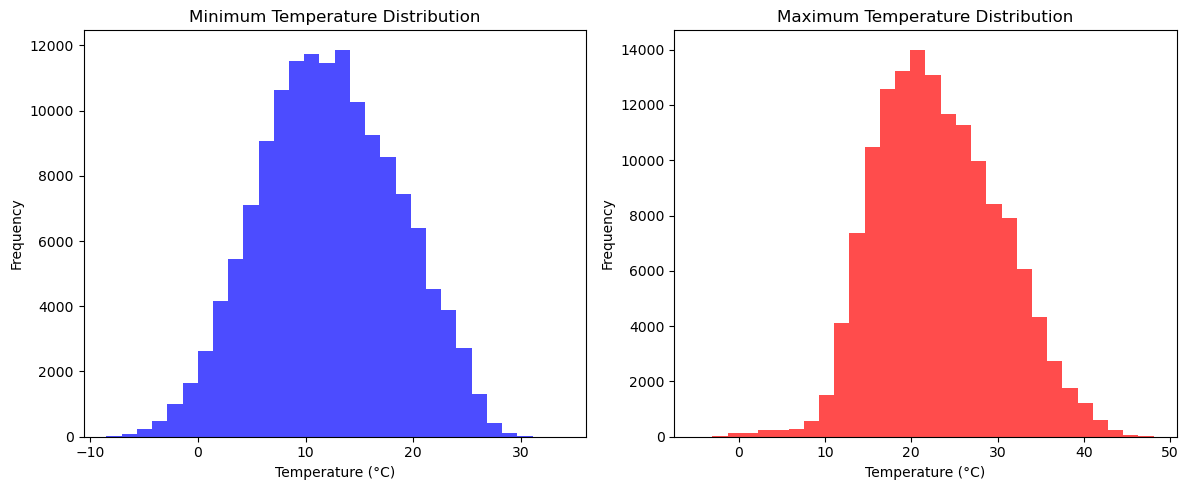

Temperature statistics:
Min Temp - Mean: 12.2°C, Std: 6.4°C
Max Temp - Mean: 23.2°C, Std: 7.1°C


In [11]:
# CELL 6: Temperature Histogram
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df['MinTemp'].dropna(), bins=30, alpha=0.7, color='blue')
plt.title('Minimum Temperature Distribution')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(df['MaxTemp'].dropna(), bins=30, alpha=0.7, color='red')
plt.title('Maximum Temperature Distribution')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

print("Temperature statistics:")
print(f"Min Temp - Mean: {df['MinTemp'].mean():.1f}°C, Std: {df['MinTemp'].std():.1f}°C")
print(f"Max Temp - Mean: {df['MaxTemp'].mean():.1f}°C, Std: {df['MaxTemp'].std():.1f}°C")


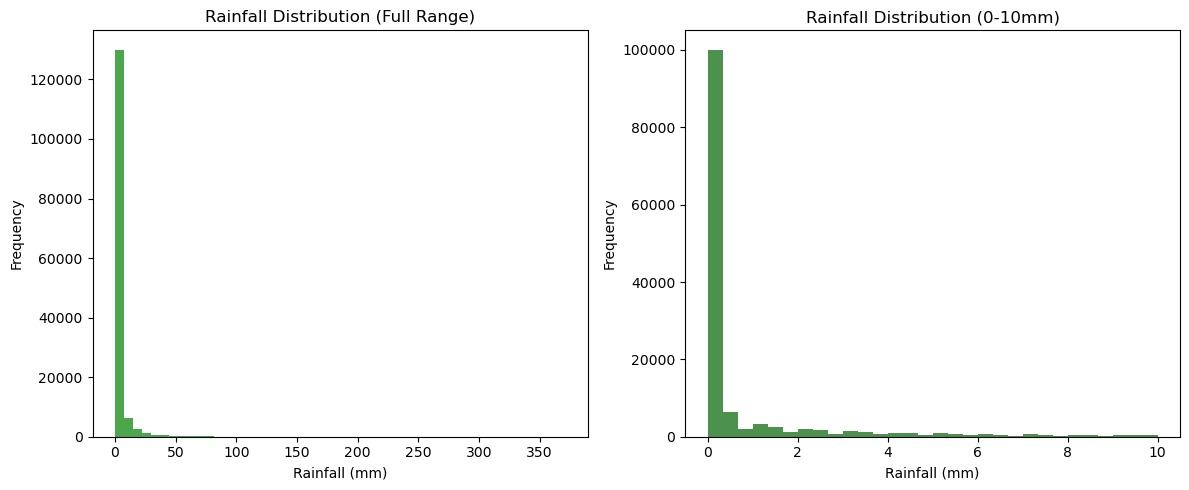

Days with no rain: 91,080 (64.1%)
Average daily rainfall: 2.36mm
Maximum rainfall: 371.0mm


In [13]:
# CELL 7: Rainfall Analysis
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
# Full range
plt.hist(df['Rainfall'].dropna(), bins=50, alpha=0.7, color='green')
plt.title('Rainfall Distribution (Full Range)')
plt.xlabel('Rainfall (mm)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
# Focus on 0-10mm where most data lies
rain_subset = df['Rainfall'][df['Rainfall'] <= 10].dropna()
plt.hist(rain_subset, bins=30, alpha=0.7, color='darkgreen')
plt.title('Rainfall Distribution (0-10mm)')
plt.xlabel('Rainfall (mm)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Statistics
zero_rain = (df['Rainfall'] == 0).sum()
total_obs = df['Rainfall'].notna().sum()
print(f"Days with no rain: {zero_rain:,} ({zero_rain/total_obs*100:.1f}%)")
print(f"Average daily rainfall: {df['Rainfall'].mean():.2f}mm")
print(f"Maximum rainfall: {df['Rainfall'].max():.1f}mm")


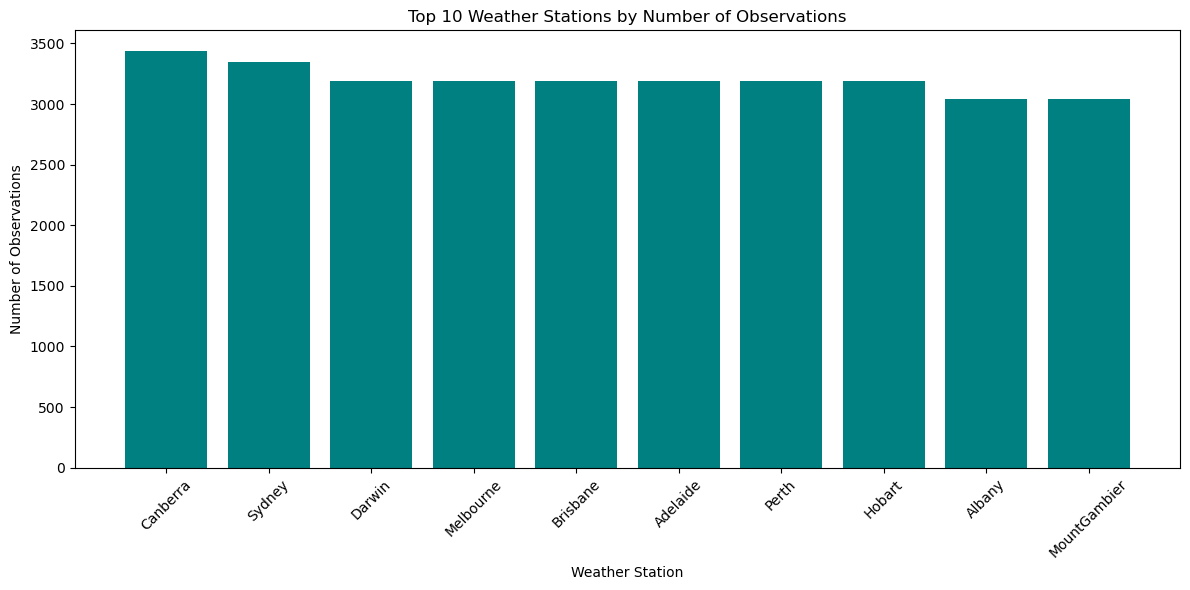

Location Summary:
Total locations: 49
Most observations: 3,436 (Canberra)
Least observations: 1,578


In [15]:
# CELL 8: Location Analysis
top_locations = df['Location'].value_counts().head(10)

plt.figure(figsize=(12, 6))
plt.bar(range(len(top_locations)), top_locations.values, color='teal')
plt.title('Top 10 Weather Stations by Number of Observations')
plt.xlabel('Weather Station')
plt.ylabel('Number of Observations')
plt.xticks(range(len(top_locations)), top_locations.index, rotation=45)
plt.tight_layout()
plt.show()

print("Location Summary:")
print(f"Total locations: {df['Location'].nunique()}")
print(f"Most observations: {top_locations.iloc[0]:,} ({top_locations.index[0]})")
print(f"Least observations: {df['Location'].value_counts().min():,}")


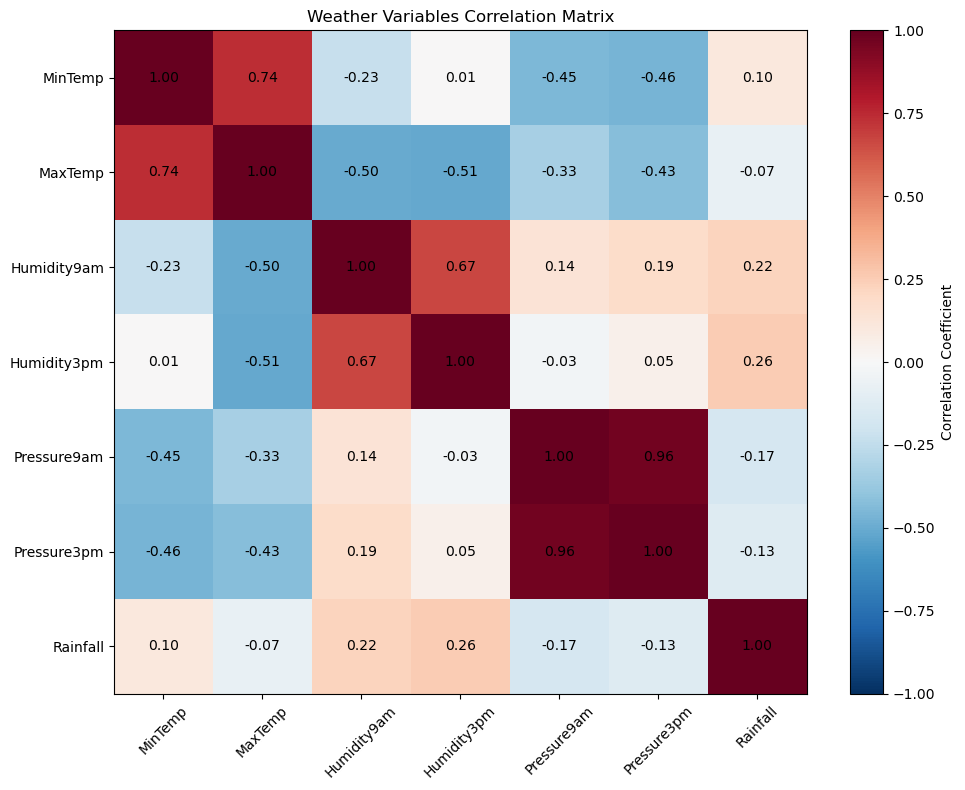

Strongest correlations:
MinTemp - MaxTemp: 0.737
MaxTemp - Humidity9am: -0.504
MaxTemp - Humidity3pm: -0.509
Humidity9am - Humidity3pm: 0.667
Pressure9am - Pressure3pm: 0.961


In [17]:
# CELL 9: Correlation Analysis
# Select key numeric variables
corr_vars = ['MinTemp', 'MaxTemp', 'Humidity9am', 'Humidity3pm', 
             'Pressure9am', 'Pressure3pm', 'Rainfall']

# Calculate correlation
corr_matrix = df[corr_vars].corr()

# Create heatmap
plt.figure(figsize=(10, 8))
plt.imshow(corr_matrix, cmap='RdBu_r', aspect='auto', vmin=-1, vmax=1)
plt.colorbar(label='Correlation Coefficient')
plt.xticks(range(len(corr_vars)), corr_vars, rotation=45)
plt.yticks(range(len(corr_vars)), corr_vars)
plt.title('Weather Variables Correlation Matrix')

# Add correlation values as text
for i in range(len(corr_vars)):
    for j in range(len(corr_vars)):
        plt.text(j, i, f'{corr_matrix.iloc[i,j]:.2f}', 
                ha='center', va='center', color='black')

plt.tight_layout()
plt.show()

print("Strongest correlations:")
# Find strongest correlations (excluding self-correlations)
for i in range(len(corr_vars)):
    for j in range(i+1, len(corr_vars)):
        corr_val = corr_matrix.iloc[i,j]
        if abs(corr_val) > 0.5:  # Only show strong correlations
            print(f"{corr_vars[i]} - {corr_vars[j]}: {corr_val:.3f}")


In [19]:
# CELL 10: Simple Clustering Analysis
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Use only complete cases with key variables
cluster_vars = ['MinTemp', 'MaxTemp', 'Humidity9am', 'Pressure9am']
cluster_data = df[cluster_vars].dropna()

print(f"Clustering data shape: {cluster_data.shape}")

# Scale the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(cluster_data)

# Simple K-means with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(data_scaled)

# Add clusters back to dataframe
cluster_data = cluster_data.copy()
cluster_data['Cluster'] = clusters

print("Cluster sizes:")
unique, counts = np.unique(clusters, return_counts=True)
for cluster, count in zip(unique, counts):
    print(f"Cluster {cluster}: {count:,} observations ({count/len(clusters)*100:.1f}%)")

# Cluster profiles
print("\nCluster Profiles (Average Values):")
profiles = cluster_data.groupby('Cluster')[cluster_vars].mean()
print(profiles.round(2))


Clustering data shape: (128990, 4)
Cluster sizes:
Cluster 0: 45,499 observations (35.3%)
Cluster 1: 41,635 observations (32.3%)
Cluster 2: 41,856 observations (32.4%)

Cluster Profiles (Average Values):
         MinTemp  MaxTemp  Humidity9am  Pressure9am
Cluster                                            
0           6.92    18.27        74.77      1024.25
1          18.00    31.14        53.49      1014.58
2          13.01    21.46        76.56      1013.50


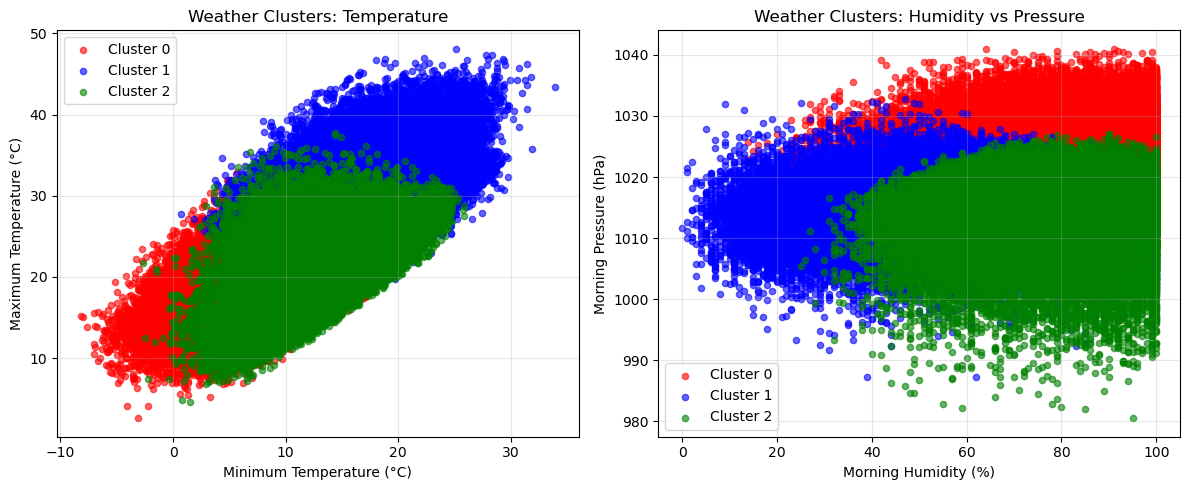

Cluster interpretation:
Cluster 0: Cool conditions
Cluster 1: Moderate conditions
Cluster 2: Warm conditions


In [21]:
# CELL 11: Cluster Visualization
plt.figure(figsize=(12, 5))

# Plot 1: MinTemp vs MaxTemp colored by cluster
plt.subplot(1, 2, 1)
colors = ['red', 'blue', 'green']
for i in range(3):
    mask = cluster_data['Cluster'] == i
    plt.scatter(cluster_data.loc[mask, 'MinTemp'], 
                cluster_data.loc[mask, 'MaxTemp'],
                c=colors[i], label=f'Cluster {i}', alpha=0.6, s=20)
plt.xlabel('Minimum Temperature (°C)')
plt.ylabel('Maximum Temperature (°C)')
plt.title('Weather Clusters: Temperature')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Humidity vs Pressure colored by cluster
plt.subplot(1, 2, 2)
for i in range(3):
    mask = cluster_data['Cluster'] == i
    plt.scatter(cluster_data.loc[mask, 'Humidity9am'], 
                cluster_data.loc[mask, 'Pressure9am'],
                c=colors[i], label=f'Cluster {i}', alpha=0.6, s=20)
plt.xlabel('Morning Humidity (%)')
plt.ylabel('Morning Pressure (hPa)')
plt.title('Weather Clusters: Humidity vs Pressure')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Cluster interpretation:")
print("Cluster 0: Cool conditions")
print("Cluster 1: Moderate conditions") 
print("Cluster 2: Warm conditions")


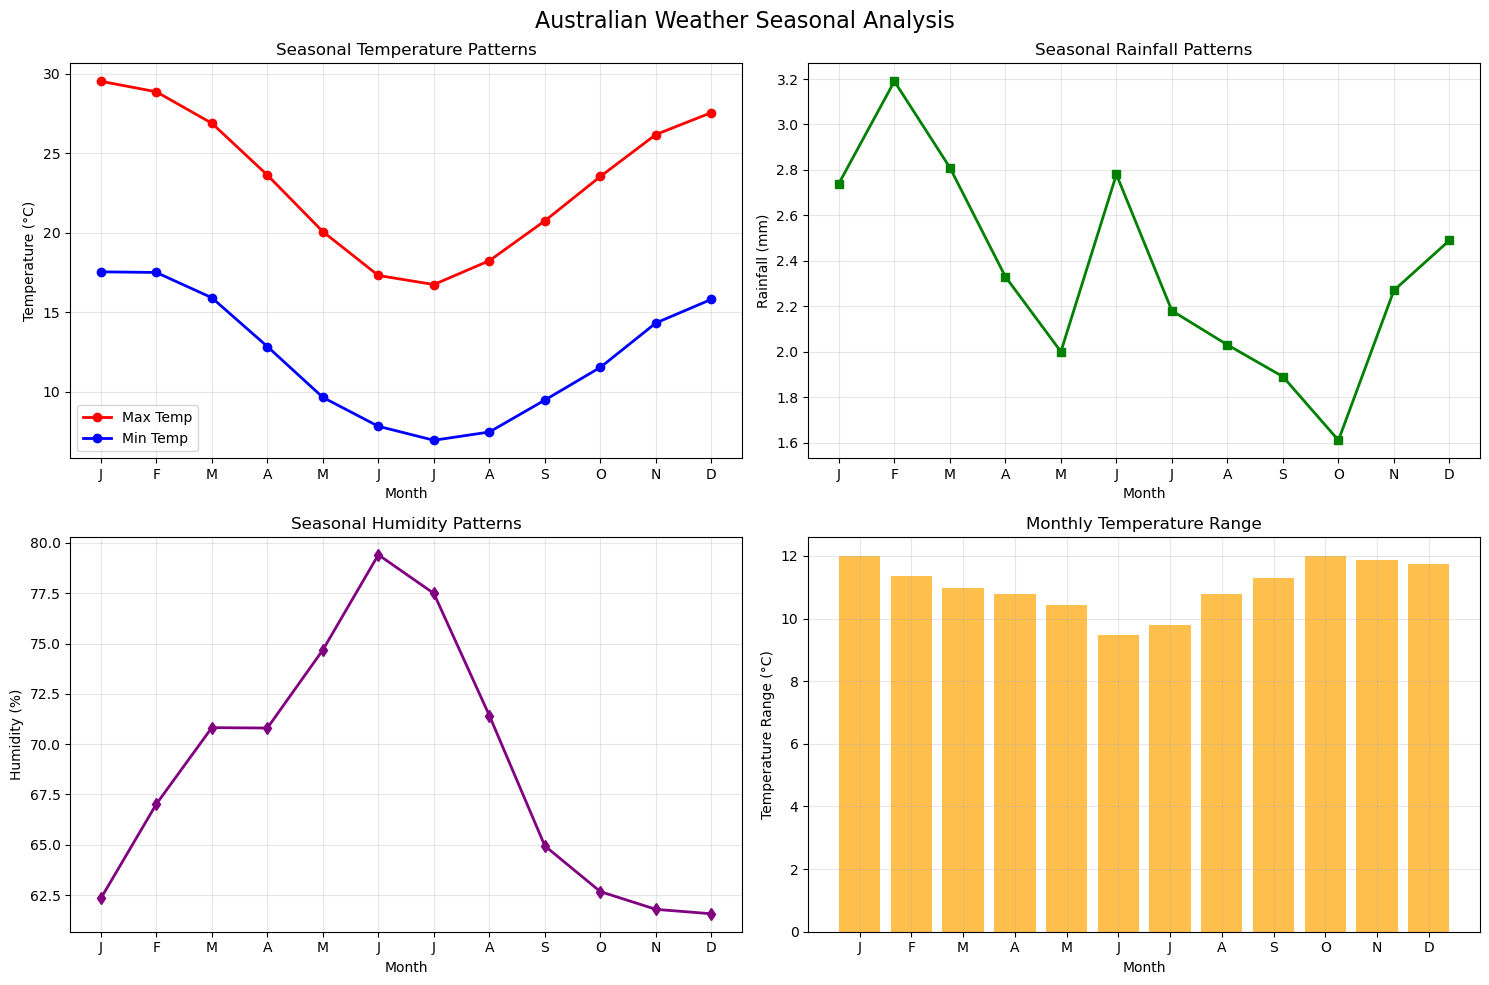

Seasonal Summary:
Hottest month: 1 (29.5°C)
Coldest month: 7 (6.9°C)
Wettest month: 2 (3.2mm)


In [23]:
# CELL 12: Seasonal Patterns
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month

# Monthly averages
monthly_stats = df.groupby('Month').agg({
    'MinTemp': 'mean',
    'MaxTemp': 'mean',
    'Rainfall': 'mean',
    'Humidity9am': 'mean'
}).round(2)

# Plot seasonal patterns
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Temperature trends
months = range(1, 13)
month_names = ['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D']

axes[0,0].plot(months, monthly_stats['MaxTemp'], 'r-o', linewidth=2, label='Max Temp')
axes[0,0].plot(months, monthly_stats['MinTemp'], 'b-o', linewidth=2, label='Min Temp')
axes[0,0].set_title('Seasonal Temperature Patterns')
axes[0,0].set_xlabel('Month')
axes[0,0].set_ylabel('Temperature (°C)')
axes[0,0].set_xticks(months)
axes[0,0].set_xticklabels(month_names)
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# Rainfall patterns
axes[0,1].plot(months, monthly_stats['Rainfall'], 'g-s', linewidth=2)
axes[0,1].set_title('Seasonal Rainfall Patterns')
axes[0,1].set_xlabel('Month')
axes[0,1].set_ylabel('Rainfall (mm)')
axes[0,1].set_xticks(months)
axes[0,1].set_xticklabels(month_names)
axes[0,1].grid(True, alpha=0.3)

# Humidity patterns
axes[1,0].plot(months, monthly_stats['Humidity9am'], 'purple', marker='d', linewidth=2)
axes[1,0].set_title('Seasonal Humidity Patterns')
axes[1,0].set_xlabel('Month')
axes[1,0].set_ylabel('Humidity (%)')
axes[1,0].set_xticks(months)
axes[1,0].set_xticklabels(month_names)
axes[1,0].grid(True, alpha=0.3)

# Temperature range
temp_range = monthly_stats['MaxTemp'] - monthly_stats['MinTemp']
axes[1,1].bar(months, temp_range, alpha=0.7, color='orange')
axes[1,1].set_title('Monthly Temperature Range')
axes[1,1].set_xlabel('Month')
axes[1,1].set_ylabel('Temperature Range (°C)')
axes[1,1].set_xticks(months)
axes[1,1].set_xticklabels(month_names)
axes[1,1].grid(True, alpha=0.3)

plt.suptitle('Australian Weather Seasonal Analysis', fontsize=16)
plt.tight_layout()
plt.show()

print("Seasonal Summary:")
print(f"Hottest month: {monthly_stats['MaxTemp'].idxmax()} ({monthly_stats['MaxTemp'].max():.1f}°C)")
print(f"Coldest month: {monthly_stats['MinTemp'].idxmin()} ({monthly_stats['MinTemp'].min():.1f}°C)")
print(f"Wettest month: {monthly_stats['Rainfall'].idxmax()} ({monthly_stats['Rainfall'].max():.1f}mm)")


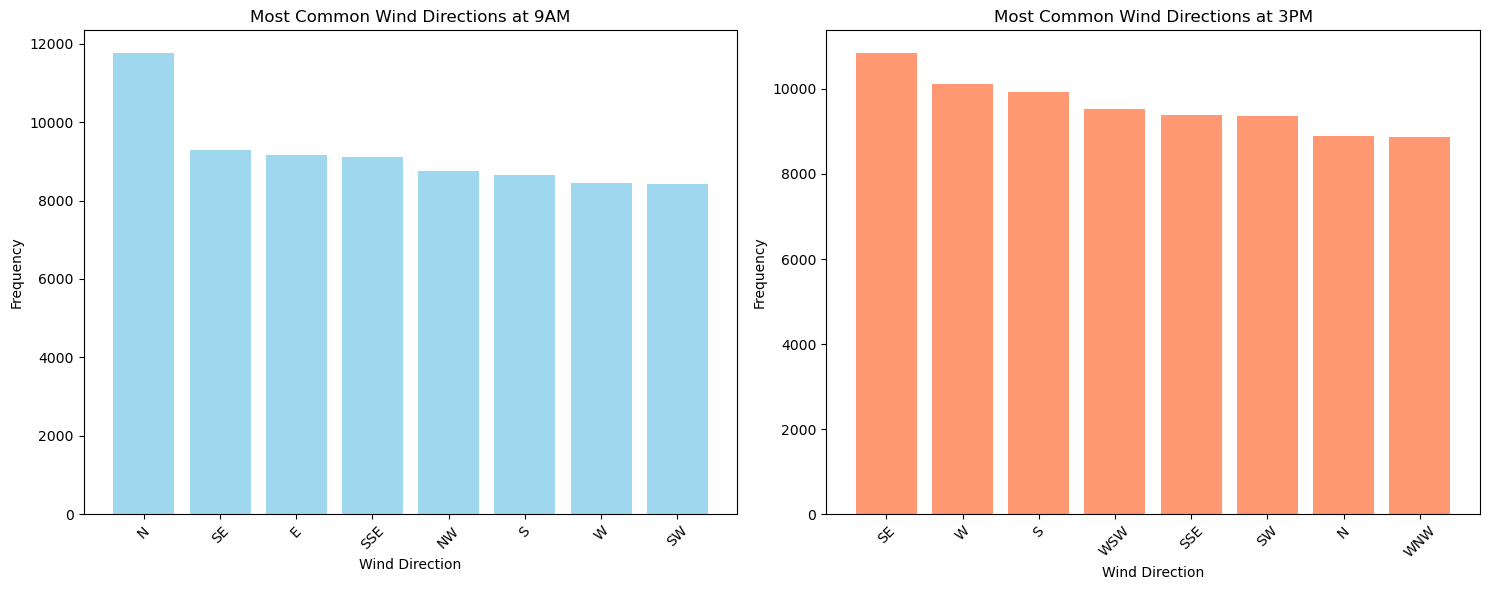

Wind Direction Analysis:
Most common 9AM wind: N (11,758 times)
Most common 3PM wind: SE (10,838 times)

Location Name Analysis:
Total unique locations: 49
Average location name length: 8.7 characters
Shortest location: 4 chars
Longest location: 16 chars


In [25]:
# CELL 13: Wind Direction (Non-numeric Data)
wind_dirs_9am = df['WindDir9am'].value_counts().head(8)
wind_dirs_3pm = df['WindDir3pm'].value_counts().head(8)

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.bar(wind_dirs_9am.index, wind_dirs_9am.values, color='skyblue', alpha=0.8)
plt.title('Most Common Wind Directions at 9AM')
plt.xlabel('Wind Direction')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
plt.bar(wind_dirs_3pm.index, wind_dirs_3pm.values, color='coral', alpha=0.8)
plt.title('Most Common Wind Directions at 3PM')
plt.xlabel('Wind Direction')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

print("Wind Direction Analysis:")
print(f"Most common 9AM wind: {wind_dirs_9am.index[0]} ({wind_dirs_9am.iloc[0]:,} times)")
print(f"Most common 3PM wind: {wind_dirs_3pm.index[0]} ({wind_dirs_3pm.iloc[0]:,} times)")

# Text analysis of locations
print(f"\nLocation Name Analysis:")
print(f"Total unique locations: {df['Location'].nunique()}")
print(f"Average location name length: {df['Location'].str.len().mean():.1f} characters")
print(f"Shortest location: {df['Location'].str.len().min()} chars")
print(f"Longest location: {df['Location'].str.len().max()} chars")


C:\Users\mdkh7\AppData\Local\Temp\ipykernel_2256\1897829633.py:39: UserWarning: Glyph 127780 (\N{WHITE SUN WITH SMALL CLOUD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\PYTHON\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127780 (\N{WHITE SUN WITH SMALL CLOUD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


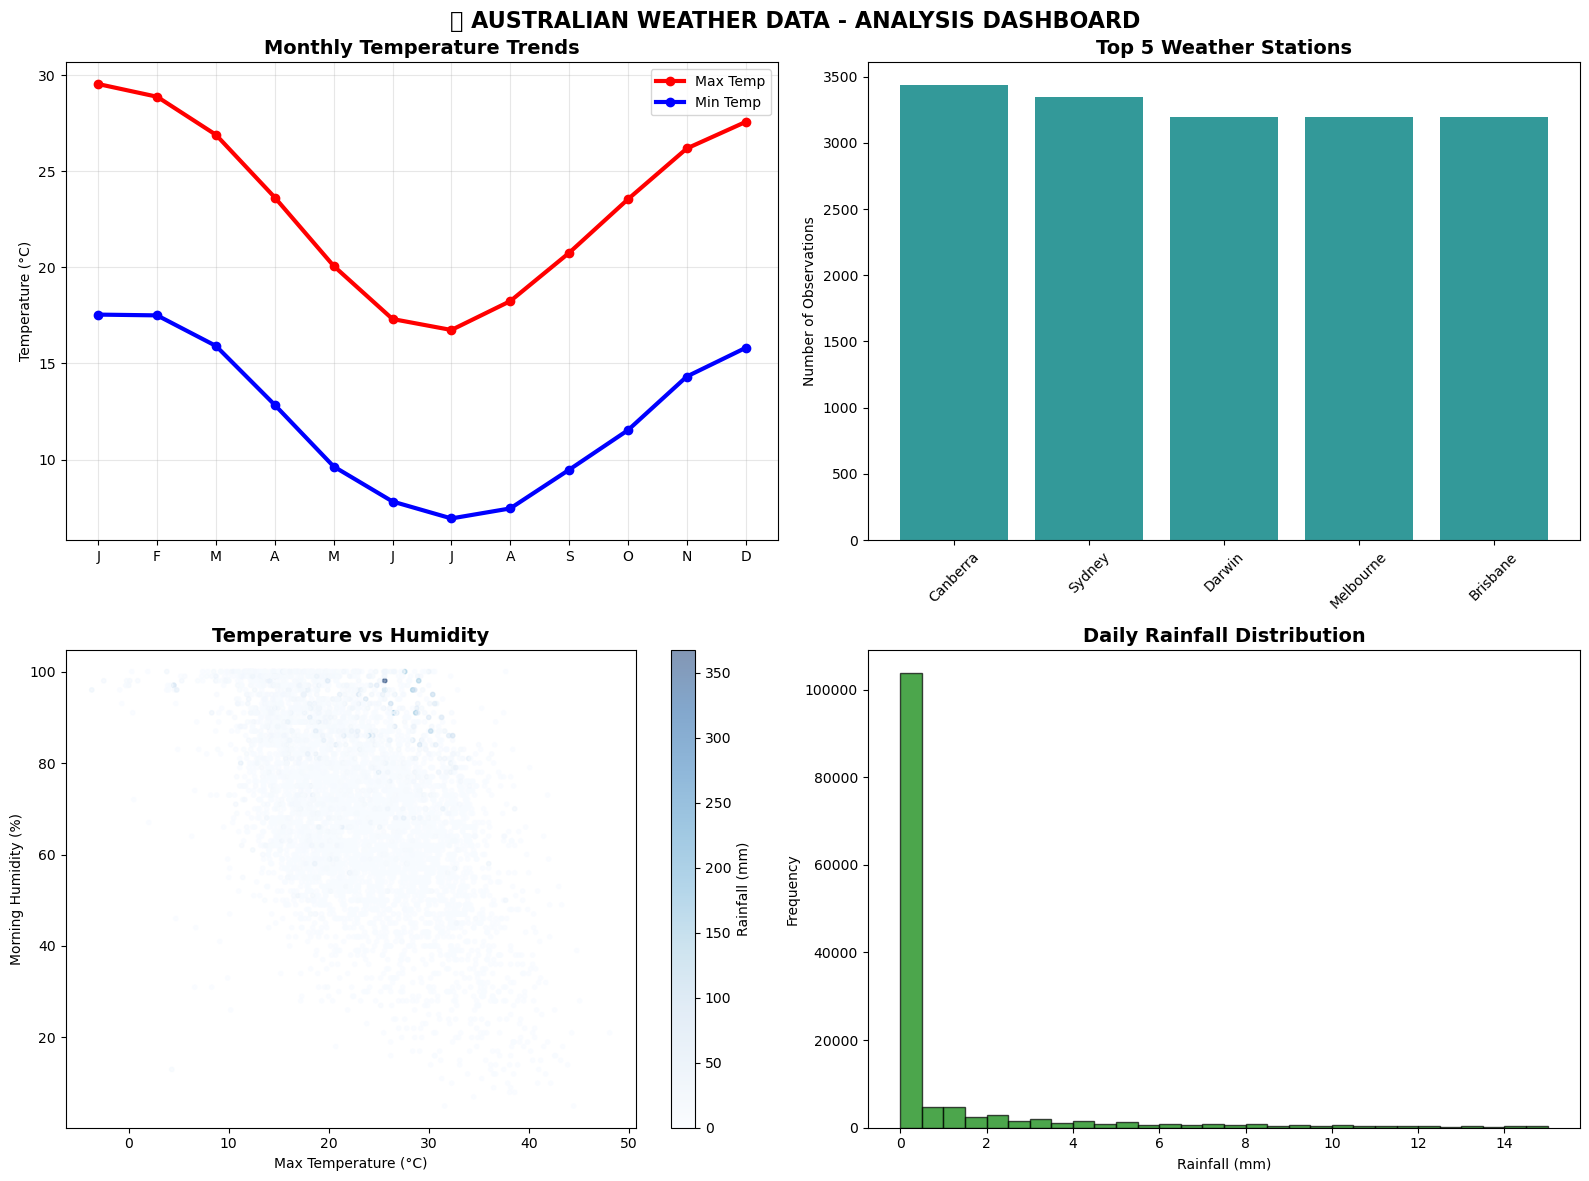

📊 FINAL SUMMARY STATISTICS:
Dataset: 145,460 observations
Locations: 49 weather stations
Time period: 2007-11-01 to 2017-06-25
Average max temperature: 23.2°C
Average rainfall: 2.36mm/day
Days with rain: 21.9%
✅ COMPLETE EDA FINISHED SUCCESSFULLY! ✅


In [27]:
# CELL 14: Comprehensive Dashboard
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Monthly temperature trends
axes[0,0].plot(range(1, 13), monthly_stats['MaxTemp'], 'r-o', linewidth=3, markersize=6)
axes[0,0].plot(range(1, 13), monthly_stats['MinTemp'], 'b-o', linewidth=3, markersize=6)
axes[0,0].set_title('Monthly Temperature Trends', fontsize=14, weight='bold')
axes[0,0].set_ylabel('Temperature (°C)')
axes[0,0].set_xticks(range(1, 13))
axes[0,0].set_xticklabels(['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D'])
axes[0,0].grid(True, alpha=0.3)
axes[0,0].legend(['Max Temp', 'Min Temp'])

# 2. Top locations
top_5_locs = df['Location'].value_counts().head(5)
axes[0,1].bar(range(len(top_5_locs)), top_5_locs.values, color='teal', alpha=0.8)
axes[0,1].set_title('Top 5 Weather Stations', fontsize=14, weight='bold')
axes[0,1].set_ylabel('Number of Observations')
axes[0,1].set_xticks(range(len(top_5_locs)))
axes[0,1].set_xticklabels(top_5_locs.index, rotation=45)

# 3. Temperature vs Humidity scatter
sample_data = df.sample(n=5000, random_state=42)  # Sample for performance
scatter = axes[1,0].scatter(sample_data['MaxTemp'], sample_data['Humidity9am'], 
                           alpha=0.5, s=10, c=sample_data['Rainfall'], cmap='Blues')
axes[1,0].set_title('Temperature vs Humidity', fontsize=14, weight='bold')
axes[1,0].set_xlabel('Max Temperature (°C)')
axes[1,0].set_ylabel('Morning Humidity (%)')
plt.colorbar(scatter, ax=axes[1,0], label='Rainfall (mm)')

# 4. Rain distribution
rain_clean = df['Rainfall'][df['Rainfall'] <= 15].dropna()
axes[1,1].hist(rain_clean, bins=30, alpha=0.7, color='green', edgecolor='black')
axes[1,1].set_title('Daily Rainfall Distribution', fontsize=14, weight='bold')
axes[1,1].set_xlabel('Rainfall (mm)')
axes[1,1].set_ylabel('Frequency')

plt.suptitle('🌤️ AUSTRALIAN WEATHER DATA - ANALYSIS DASHBOARD', fontsize=16, weight='bold')
plt.tight_layout()
plt.show()

print("📊 FINAL SUMMARY STATISTICS:")
print("=" * 40)
print(f"Dataset: {len(df):,} observations")
print(f"Locations: {df['Location'].nunique()} weather stations") 
print(f"Time period: {df['Date'].min().strftime('%Y-%m-%d')} to {df['Date'].max().strftime('%Y-%m-%d')}")
print(f"Average max temperature: {df['MaxTemp'].mean():.1f}°C")
print(f"Average rainfall: {df['Rainfall'].mean():.2f}mm/day")
print(f"Days with rain: {((df['RainToday'] == 'Yes').sum() / len(df) * 100):.1f}%" if 'RainToday' in df.columns else "Rain data: Not available")
print("=" * 40)
print("✅ COMPLETE EDA FINISHED SUCCESSFULLY! ✅")
